In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
!pip install pyunpack
!pip install patool
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.8 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [3]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

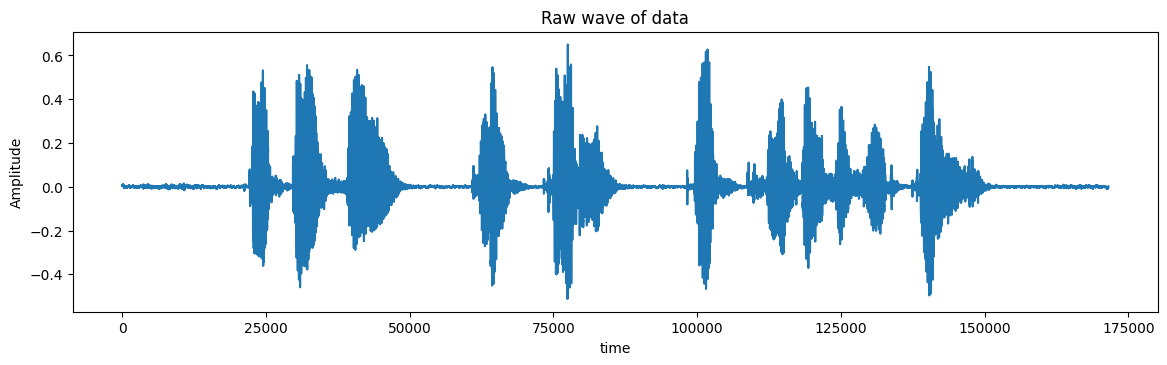

In [4]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav', sr = 40000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

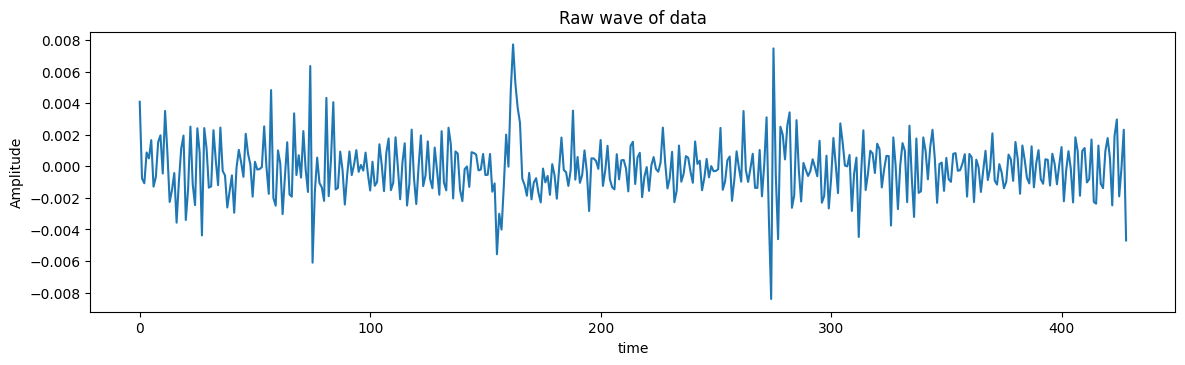

In [5]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

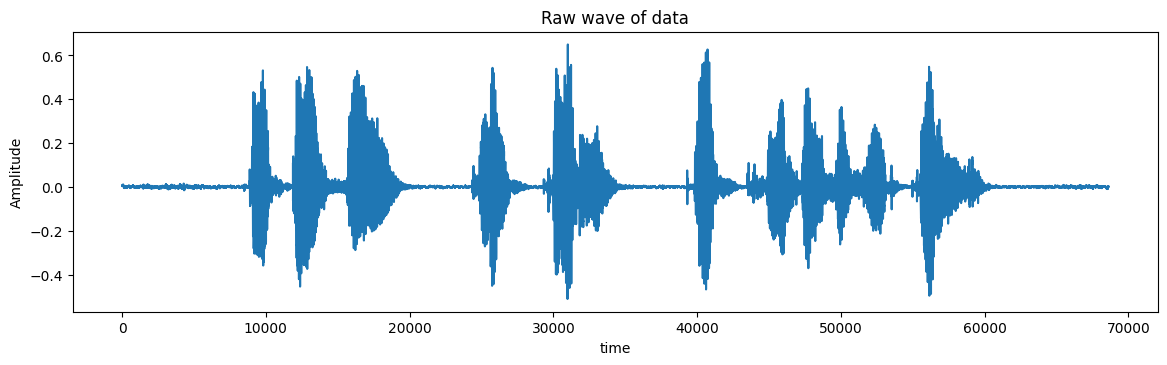

In [6]:
sample_rate=16000
samples, sample_rate = librosa.load('/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav', sr = sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of data')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)
ipd.Audio(samples, rate=sample_rate)


# Labelling and dataframe

In [7]:
import os
path="/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets"

# Change the directory
os.chdir(path)
path

'/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets'

In [8]:
os.listdir()

['Hindi', 'Bengali', 'Marathi', 'Tamil', 'Malayalam', 'Telugu']

In [9]:
import librosa
from sklearn.model_selection import train_test_split

In [10]:
audio_list=[]
label_list=[]
full_path_list=[]
for j in os.listdir(path):
  for i in os.listdir(path+'/'+j):
    audio_list.append(i)
    label_list.append(j)
    full_path=path+"/"+j+"/"+i
    full_path_list.append(full_path)

In [11]:
metadata1=pd.DataFrame(full_path_list,columns=['full path'])
metadata2=pd.DataFrame(label_list,columns=['Class'])
final_metadata = pd.concat([metadata1, metadata2], axis=1)

In [12]:
final_metadata

,full path,Class
0,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Hindi
1,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Hindi
2,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Hindi
3,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Hindi
4,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Hindi
...,...,...
5575,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu
5576,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu
5577,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu
5578,/content/drive/MyDrive/Datasets/IIIT Spoken La...,Telugu


In [13]:
labels=os.listdir(path)


In [14]:
labels

['Hindi', 'Bengali', 'Marathi', 'Tamil', 'Malayalam', 'Telugu']

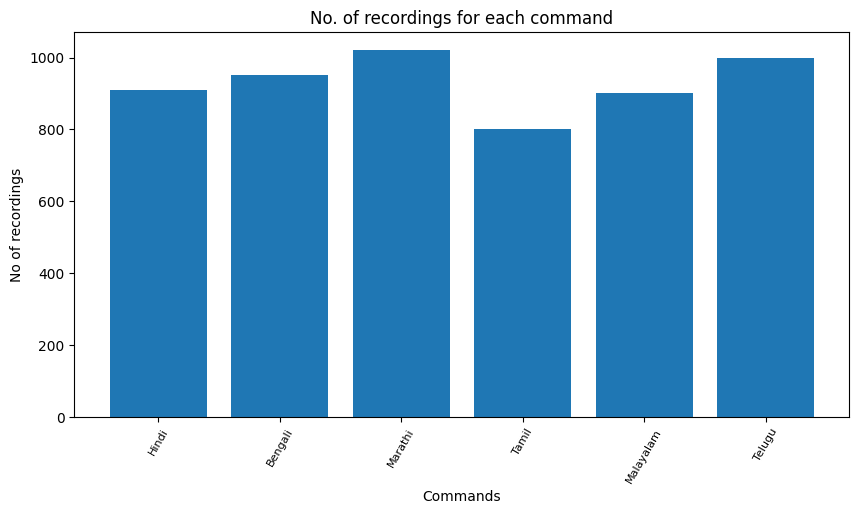

In [15]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

#plot
plt.figure(figsize=(10,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=10)
plt.ylabel('No of recordings', fontsize=10)
plt.xticks(index, labels, fontsize=8, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

# Feature extraction

In [16]:
y, sr = librosa.load("/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets/Bengali/ben_0001.wav",sr=1000)
y

array([ 0.00283563,  0.00612354,  0.00578164, ..., -0.00309004,
        0.00102975,  0.        ], dtype=float32)

In [17]:
g=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=14)

In [18]:
g

array([[-91.354164 ,   8.2135105,  13.451161 ,  27.245552 ,  36.773308 ,
          7.9451756,  20.393032 ,   8.496858 , -68.54078  ],
       [-30.42646  , -44.734035 , -53.02015  , -78.638504 , -87.76258  ,
        -51.237373 , -52.991028 , -69.63844  , -47.917973 ],
       [-40.2817   , -64.404526 , -68.60042  , -70.35275  , -65.30181  ,
        -61.028053 , -70.36246  , -70.05961  , -49.741253 ],
       [ 21.299267 ,  -1.6624643,  -7.918603 ,   6.335641 ,   1.4031129,
        -12.54231  , -17.781055 ,  -7.794032 ,   5.924755 ],
       [-41.557358 , -43.260754 , -42.935593 , -45.44297  , -46.236187 ,
        -38.688995 , -34.656654 , -39.48002  , -31.007881 ],
       [ 19.98996  ,  30.104328 ,  30.268589 ,  31.17049  ,  27.711212 ,
         40.584137 ,  42.175716 ,  26.973862 ,  28.230536 ],
       [-12.938786 , -15.76582  ,   1.7899922,  31.958622 ,  19.576555 ,
         -8.944496 , -15.379667 , -29.6646   , -43.581    ],
       [ 57.91042  ,  54.027245 ,  51.37503  ,  48.72072  ,  5

In [19]:
g.shape

(14, 9)

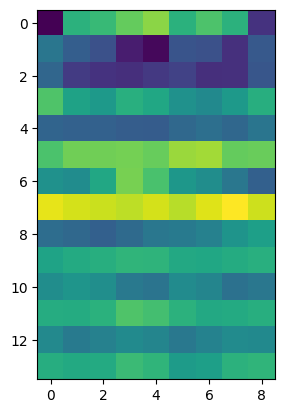

In [20]:
plt.imshow(g)

In [23]:
import glob
wave_file = glob.glob(path +"/*.wav")

In [24]:
scale_feature=[]
for i in final_metadata['full path']:
  # print(i)
  # librosa.load(i)

  s,sr=librosa.load(i)
  g=librosa.feature.mfcc(y=s,sr=sr,n_mfcc=14)

  mfcc_scaled=np.mean(g.T,axis=0)
  scale_feature.append(mfcc_scaled)

In [26]:
scale_feature

[array([-4.2313687e+02,  6.9379074e+01, -1.2349184e+01,  6.7716591e+01,
        -1.6793606e+01,  1.3515331e+01, -7.4298162e+00,  3.8090079e+00,
        -3.8582381e-02, -2.6398617e-01,  3.9050355e+00, -5.3173957e+00,
         3.1080079e+00,  3.4833199e-01], dtype=float32),
 array([-3.8770889e+02,  9.0002182e+01, -1.7967560e+01,  5.6627743e+01,
        -2.8575922e+01,  9.6798820e+00, -9.7042913e+00, -2.3932042e+00,
        -2.6289442e+00, -4.0173178e+00, -1.3589517e+00, -5.5318007e+00,
         2.8967285e-01, -9.3563002e-01], dtype=float32),
 array([-4.1376666e+02,  7.8916214e+01, -1.1475442e+01,  4.2212337e+01,
        -2.2693523e+01,  2.0751911e+01, -4.8066797e+00, -2.7290044e+00,
         5.8187685e+00,  1.7845042e+00,  3.9718277e+00, -6.6717544e+00,
        -1.5598351e-01,  1.0456688e+00], dtype=float32),
 array([-336.59988  ,   58.765327 ,  -12.879261 ,   45.91371  ,
         -15.289166 ,    1.1037147,   -2.9990232,   -6.9796214,
           1.7081265,   -3.3070087,   -2.2494068,   -

# Dataframe of MFCC

In [27]:
df_mfcc=pd.DataFrame(scale_feature)

In [28]:
df_mfcc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-423.136871,69.379074,-12.349184,67.716591,-16.793606,13.515331,-7.429816,3.809008,-0.038582,-0.263986,3.905035,-5.317396,3.108008,0.348332
1,-387.708893,90.002182,-17.967560,56.627743,-28.575922,9.679882,-9.704291,-2.393204,-2.628944,-4.017318,-1.358952,-5.531801,0.289673,-0.935630
2,-413.766663,78.916214,-11.475442,42.212337,-22.693523,20.751911,-4.806680,-2.729004,5.818769,1.784504,3.971828,-6.671754,-0.155984,1.045669
3,-336.599884,58.765327,-12.879261,45.913712,-15.289166,1.103715,-2.999023,-6.979621,1.708127,-3.307009,-2.249407,-5.762413,-1.379230,3.583852
4,-376.600403,87.531914,-26.005219,56.994209,-26.942574,11.561555,-6.533697,-2.333733,-1.502187,-0.076931,-0.791218,-8.191182,1.807470,-1.422021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,-445.851562,147.462845,12.675552,30.269295,10.263466,6.589751,-16.506947,-3.165465,0.890960,-0.572254,-0.252087,-0.682174,7.997992,-8.942049
5576,-443.683319,139.045914,10.684545,45.747982,16.329605,4.076168,-9.520866,-0.403483,-5.913675,0.415427,-2.836927,-7.121993,5.089151,-10.028808
5577,-427.387054,147.000336,13.154522,21.333727,19.178196,6.493382,-15.327624,-9.215030,-1.496473,1.409057,-1.244980,-2.802243,4.733148,-3.728420
5578,-447.299194,137.844315,30.824505,24.131374,14.569251,13.284329,-21.000107,-3.749257,2.244350,-3.395008,5.859928,0.162908,-1.155062,-5.935435


In [29]:
#labelled dataframe of MFCC
finaldf = pd.concat([df_mfcc,metadata2], axis=1)

In [30]:
finaldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Class
0,-423.136871,69.379074,-12.349184,67.716591,-16.793606,13.515331,-7.429816,3.809008,-0.038582,-0.263986,3.905035,-5.317396,3.108008,0.348332,Hindi
1,-387.708893,90.002182,-17.967560,56.627743,-28.575922,9.679882,-9.704291,-2.393204,-2.628944,-4.017318,-1.358952,-5.531801,0.289673,-0.935630,Hindi
2,-413.766663,78.916214,-11.475442,42.212337,-22.693523,20.751911,-4.806680,-2.729004,5.818769,1.784504,3.971828,-6.671754,-0.155984,1.045669,Hindi
3,-336.599884,58.765327,-12.879261,45.913712,-15.289166,1.103715,-2.999023,-6.979621,1.708127,-3.307009,-2.249407,-5.762413,-1.379230,3.583852,Hindi
4,-376.600403,87.531914,-26.005219,56.994209,-26.942574,11.561555,-6.533697,-2.333733,-1.502187,-0.076931,-0.791218,-8.191182,1.807470,-1.422021,Hindi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,-445.851562,147.462845,12.675552,30.269295,10.263466,6.589751,-16.506947,-3.165465,0.890960,-0.572254,-0.252087,-0.682174,7.997992,-8.942049,Telugu
5576,-443.683319,139.045914,10.684545,45.747982,16.329605,4.076168,-9.520866,-0.403483,-5.913675,0.415427,-2.836927,-7.121993,5.089151,-10.028808,Telugu
5577,-427.387054,147.000336,13.154522,21.333727,19.178196,6.493382,-15.327624,-9.215030,-1.496473,1.409057,-1.244980,-2.802243,4.733148,-3.728420,Telugu
5578,-447.299194,137.844315,30.824505,24.131374,14.569251,13.284329,-21.000107,-3.749257,2.244350,-3.395008,5.859928,0.162908,-1.155062,-5.935435,Telugu


In [31]:
finaldf.to_csv('/content/drive/MyDrive/MiniProject/datasetfinaldf.csv')

# Train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(finaldf,finaldf['Class'],stratify = finaldf['Class'],test_size = 0.3,random_state = 0)
print(X_train['Class'].value_counts())
print(X_test['Class'].value_counts())

Marathi      714
Telugu       700
Bengali      665
Hindi        636
Malayalam    631
Tamil        560
Name: Class, dtype: int64
Marathi      306
Telugu       300
Bengali      285
Hindi        273
Malayalam    270
Tamil        240
Name: Class, dtype: int64


In [34]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Class
2202,-469.957733,141.681580,20.168941,17.752871,11.815644,-2.460560,3.234394,2.076000,-6.797422,6.559199,3.944047,0.666437,4.336332,-4.719577,Marathi
1239,-359.371002,107.316696,7.871300,34.104649,10.077962,-9.276069,-5.857750,-1.922492,-2.609194,0.763245,-5.345335,-6.107757,-0.069484,-6.028512,Bengali
2853,-413.042908,144.061737,0.303206,26.069670,22.866810,-10.192483,-6.268844,6.705270,-10.610860,3.500459,5.510531,-0.232136,4.410416,-4.799757,Marathi
1848,-355.028473,129.137833,28.413437,21.548891,-6.547827,5.897000,-4.770496,3.379054,-5.647618,-2.271777,-1.402316,-8.060447,-0.461179,-4.442917,Bengali
4881,-499.172455,160.754471,9.100614,36.785748,11.792567,11.278114,-24.539867,6.545695,3.096619,-5.112230,4.787290,-5.064826,2.630348,-11.516385,Telugu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,-392.133698,83.301414,-22.006918,58.089352,-26.365170,13.750959,-5.474630,-0.018582,-2.393162,-2.410681,0.557448,-7.492944,2.610140,0.865384,Hindi
3615,-430.004639,154.260162,-17.119873,38.002079,4.573393,1.723775,-8.294641,-7.884371,-6.585471,-3.396789,-0.509242,-4.810323,0.319293,-8.428712,Tamil
3478,-452.432922,126.442291,-6.062445,46.631931,10.652161,0.723638,-7.125795,-6.245819,-9.968689,-2.470027,-3.641485,-2.450014,3.573279,-8.054528,Tamil
5039,-507.926422,152.337555,12.902734,35.158379,10.657548,5.399517,-9.924006,4.622066,0.617286,-4.106147,1.237498,-4.553305,-0.259015,-7.855749,Telugu


In [35]:
y_train

2202    Marathi
1239    Bengali
2853    Marathi
1848    Bengali
4881     Telugu
         ...   
503       Hindi
3615      Tamil
3478      Tamil
5039     Telugu
5083     Telugu
Name: Class, Length: 3906, dtype: object

In [36]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Class
2477,-412.728485,135.370117,-22.093498,29.510548,-1.626598,5.939413,-11.571834,-3.721721,-10.871512,8.615211,1.474019,-5.435695,11.668975,-11.295326,Marathi
3789,-405.682709,148.363464,-39.298698,35.167645,5.210526,-18.297993,1.403410,-20.178503,-18.168617,3.838786,-11.917924,0.803407,-0.372701,-10.585097,Malayalam
2414,-444.883514,135.707413,-18.313566,48.841782,-2.251709,8.325912,-4.942932,-0.204704,-15.910385,7.946239,1.516558,-9.831325,13.191321,-8.411169,Marathi
2084,-430.157562,139.578186,14.513845,17.294506,11.421146,-5.715749,0.141656,-1.373267,-12.913955,4.520635,7.178217,0.495429,2.897777,-3.754876,Marathi
20,-370.963135,79.467415,-35.437645,62.218914,-34.263538,16.181774,-9.671758,-7.043342,-2.180266,-3.909082,0.231377,-7.230678,4.116642,-2.087191,Hindi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-426.648743,81.334930,-22.835920,53.150700,-23.382912,17.914869,-9.321529,4.654466,1.647421,2.309296,2.112918,-8.617507,7.590801,0.664817,Hindi
4259,-440.240692,126.274651,-28.888983,43.015034,-5.940012,-18.810734,-2.339132,-16.200722,-2.085790,0.386811,-3.726732,6.344758,-3.703342,-5.334028,Malayalam
3652,-394.343964,131.450165,-23.712515,39.692963,9.052152,1.881165,-11.428048,-10.196633,-10.455640,-1.881654,-0.115546,-3.448152,1.753621,-11.032889,Tamil
2413,-416.618774,126.699936,-10.089492,39.816410,8.400286,-4.472966,-6.496688,-7.197846,-15.243772,7.575964,-0.048332,-7.685400,9.818155,-3.747320,Marathi


In [37]:
y_test

2477      Marathi
3789    Malayalam
2414      Marathi
2084      Marathi
20          Hindi
          ...    
285         Hindi
4259    Malayalam
3652        Tamil
2413      Marathi
3149        Tamil
Name: Class, Length: 1674, dtype: object

# Sequential

In [ ]:
pip install tensorflow
pip install keras

In [38]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Embedding

In [39]:
X1 = finaldf.iloc[:,:-1]
y1 = finaldf.Class

In [40]:
X_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state = 1)

In [41]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Embedding


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=X_train1.shape[1]))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric values
y_train1 = label_encoder.fit_transform(y_train1)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train1, y_train1, epochs=24, batch_size=32)

Epoch 1/24
140/140 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1633
Epoch 2/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 3/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 4/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 5/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 6/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 7/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 8/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 9/24
140/140 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1631
Epoch 10/24
140/140 [==============================] - 0s 3ms/st

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test1)


In [44]:
loss, accuracy = model1.evaluate(x_test1, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1622
Test Loss: 0.0
Test Accuracy: 0.1621863842010498


# CNN

In [45]:
# Data Edit function
def add_noise(data):
    noise = 0.03*np.random.uniform()*np.amax(data)
    data = data + noise*np.random.normal(size=data.shape[0])
    return data

def stretch_audio(data, rate=0.7):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch_correct(data, sampling_rate, pitch_factor=0.75):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)



# prepare data functions
def prepare_features(data):
    sample_rate=22050
    result = np.array([])
    ZeroCrossingRate = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, ZeroCrossingRate))

    stft = np.abs(librosa.stft(data))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma))

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    rootMeanSquare = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rootMeanSquare))

    mSpect = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mSpect))

    return result

def prepare_all_data(path):

    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    print(sample_rate)
    clearData = prepare_features(data)
    result = np.array(clearData)

    noiseDataTmp = add_noise(data)
    noiseData = prepare_features(noiseDataTmp)
    result = np.vstack((result, noiseData))

    stretchData = stretch_audio(data)
    stretchPitchDataTmp = pitch_correct(stretchData, sample_rate)
    stretchPitchData = prepare_features(stretchPitchDataTmp)
    result = np.vstack((result, stretchPitchData))

    return result


In [ ]:
data=[]
for i in final_metadata['full path']:
  data.append(prepare_all_data(i))

In [25]:
data.shape

NameError: ignored

In [108]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from joblib import dump, load

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# X = featuresArray.iloc[: ,:-1].values
Y = final_metadata['Class'].values

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc = OneHotEncoder()
Y = enc.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(data, Y, random_state=0, shuffle=True)

sca_st = StandardScaler()
x_train = sca_st.fit_transform(x_train)
x_test = sca_st.transform(x_test)
dump(sca_st, 'std_scaler.bin', compress=True)

#print(sca_st.mean_)
#print(sca_st.var_)

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-110-abe212feadaa>", line 12, in <cell line: 12>
    x_train = sca_st.fit_transform(x_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 878, in fit_transform
    return self.fit(X, **fit_params).transform(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py", line 824, in fit
    return self.partial_fit(X, y, sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py", line 861, in partial_fit
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, i

In [97]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Update the output layer to have 7 units (assuming 7 classes in the target labels)
model.add(Dense(units=5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[rlrp])



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 15, 256)           1536      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 8, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 8, 256)            327936    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 4, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 4, 128)            163968    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 2, 128)          

ValueError: ignored

In [66]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint

In [76]:
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

In [77]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='softmax'))

In [78]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
# Define a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [91]:
# Train the model
batchsize= 32
epochs = 10

In [93]:
model.fit(X_train, y_train_encoded, batch_size=batchsize, epochs=epochs, verbose=1)

ValueError: ignored

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# LSTM

In [67]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

In [68]:
num_samples = 6587
num_timesteps = 20
num_features = 14
num_languages = 6

In [69]:
# Generate random input data and labels
X = np.random.rand(num_samples, num_timesteps, num_features)
y = np.random.randint(0, num_languages, size=(num_samples,))

In [83]:
# Convert labels to one-hot encoding
y_one = to_categorical(y, num_languages)

In [84]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(num_timesteps, num_features)))
model.add(Dropout(0.5))
model.add(Dense(units=num_languages, activation='softmax'))

In [85]:
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [86]:
# Train the model
batch_size = 32
epochs = 10
model.fit(X, y_one, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
165/165 [==============================] - 4s 13ms/step - loss: 1.8020 - accuracy: 0.1651 - val_loss: 1.7926 - val_accuracy: 0.1669
Epoch 2/10
165/165 [==============================] - 2s 14ms/step - loss: 1.7963 - accuracy: 0.1687 - val_loss: 1.7928 - val_accuracy: 0.1700
Epoch 3/10
165/165 [==============================] - 2s 12ms/step - loss: 1.7940 - accuracy: 0.1731 - val_loss: 1.7928 - val_accuracy: 0.1692
Epoch 4/10
165/165 [==============================] - 2s 10ms/step - loss: 1.7926 - accuracy: 0.1776 - val_loss: 1.7934 - val_accuracy: 0.1859
Epoch 5/10
165/165 [==============================] - 2s 10ms/step - loss: 1.7921 - accuracy: 0.1674 - val_loss: 1.7944 - val_accuracy: 0.1616
Epoch 6/10
165/165 [==============================] - 2s 10ms/step - loss: 1.7911 - accuracy: 0.1786 - val_loss: 1.7918 - val_accuracy: 0.1753
Epoch 7/10
165/165 [==============================] - 2s 10ms/step - loss: 1.7911 - accuracy: 0.1771 - val_loss: 1.7916 - val_accuracy: 0.1745